In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the data into a DataFrame
file_name = "weather_data.csv"
data = pd.read_csv(file_name)


In [3]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
                                              name    datetime  tempmax  \
0  United Ave SE, Atlanta, GA 30316, United States  2023-10-01     28.0   
1  United Ave SE, Atlanta, GA 30316, United States  2023-10-02     28.2   
2  United Ave SE, Atlanta, GA 30316, United States  2023-10-03     28.5   
3  United Ave SE, Atlanta, GA 30316, United States  2023-10-04     28.0   
4  United Ave SE, Atlanta, GA 30316, United States  2023-10-05     27.0   

   tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  humidity  ...  \
0     18.2  22.3          28.1          18.2       22.4  16.2      70.4  ...   
1     16.9  22.1          27.8          16.9       22.1  14.6      65.0  ...   
2     16.6  21.9          27.9          16.6       21.8  13.7      62.5  ...   
3     16.4  22.0          27.9          16.4       22.0  14.8      65.8  ...   
4     16.3  21.6          27.0          16.3       21.6  14.4      65.6  ...   

   solarenergy  uvindex  severerisk  

In [4]:

# Display summary information about the dataset
print("\nDataset info:")
print(data.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              367 non-null    object 
 1   datetime          367 non-null    object 
 2   tempmax           367 non-null    float64
 3   tempmin           367 non-null    float64
 4   temp              367 non-null    float64
 5   feelslikemax      367 non-null    float64
 6   feelslikemin      367 non-null    float64
 7   feelslike         367 non-null    float64
 8   dew               367 non-null    float64
 9   humidity          367 non-null    float64
 10  precip            367 non-null    float64
 11  precipprob        367 non-null    int64  
 12  precipcover       367 non-null    float64
 13  preciptype        135 non-null    object 
 14  snow              367 non-null    int64  
 15  snowdepth         367 non-null    int64  
 16  windgust          367 non-nul

In [5]:

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())



Summary statistics of numerical columns:
          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  367.000000  367.000000  367.000000    367.000000    367.000000   
mean    23.263215   13.141962   17.950136     23.643869     12.363760   
std      7.816354    8.202105    7.802472      8.684145      9.303344   
min     -0.800000  -10.600000   -4.900000     -6.900000    -17.500000   
25%     17.150000    6.250000   11.850000     17.150000      4.450000   
50%     23.900000   14.500000   18.700000     23.900000     14.500000   
75%     29.800000   20.300000   24.850000     30.600000     20.300000   
max     37.000000   25.600000   30.400000     39.400000     25.600000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  367.000000  367.000000  367.000000  367.000000  367.000000  ...   
mean    17.754768   10.606812   65.269210    3.511916   36.784741  ...   
std      8.784563    8.746580   13.240842   10.270775   48.287787  ...   
min 

In [6]:

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
preciptype    232
dtype: int64


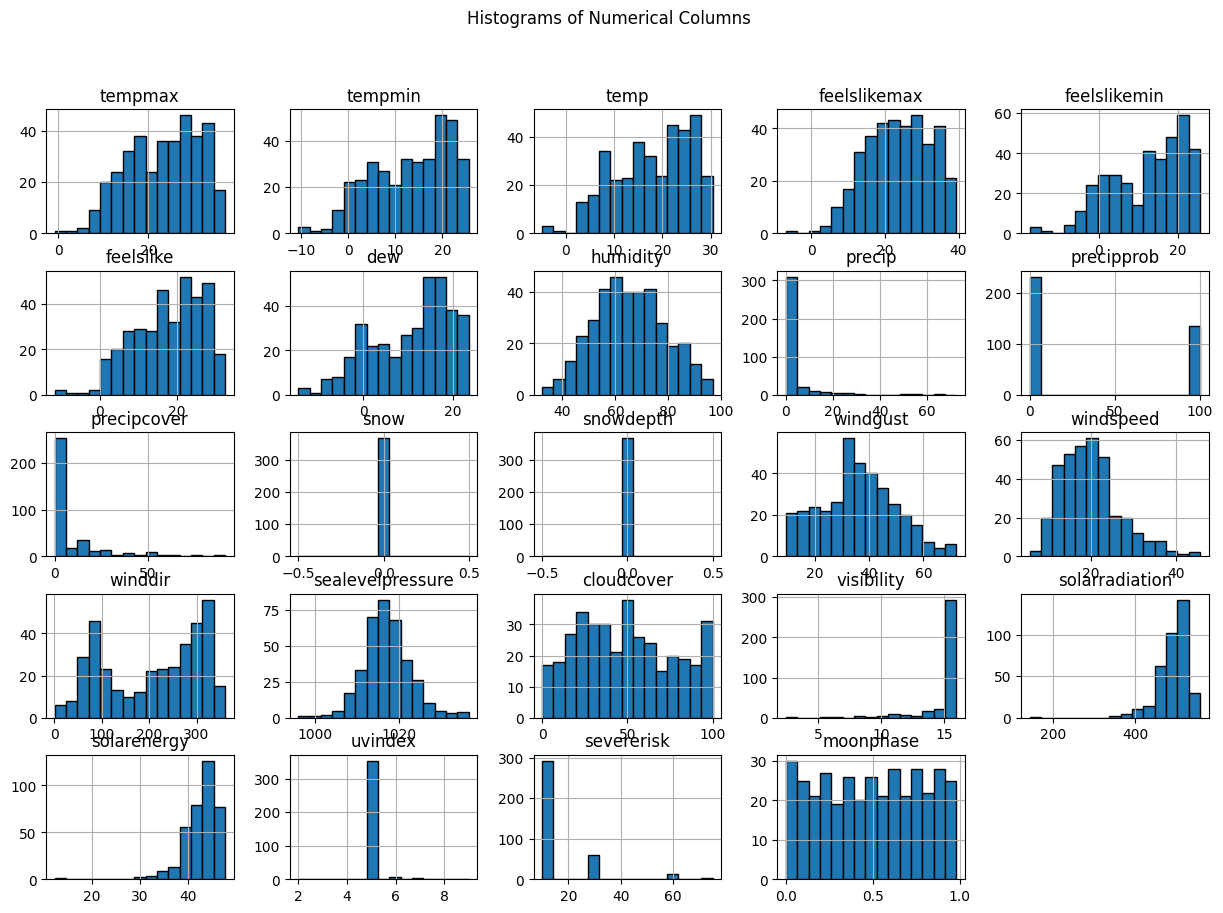

In [11]:

# Plotting histograms for numerical columns to understand their distribution
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
# plt.show()
plt.savefig("histograms.png")


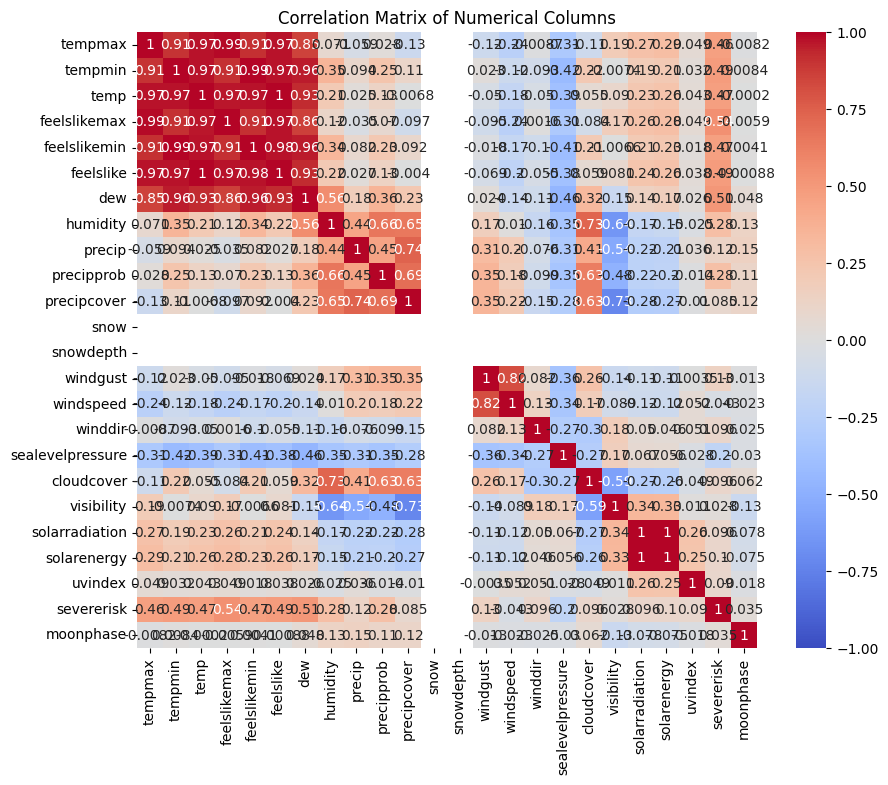

In [12]:

# Correlation matrix to check relationships between numerical variables
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Columns")
# plt.show()
plt.savefig("correlation_matrix.png")


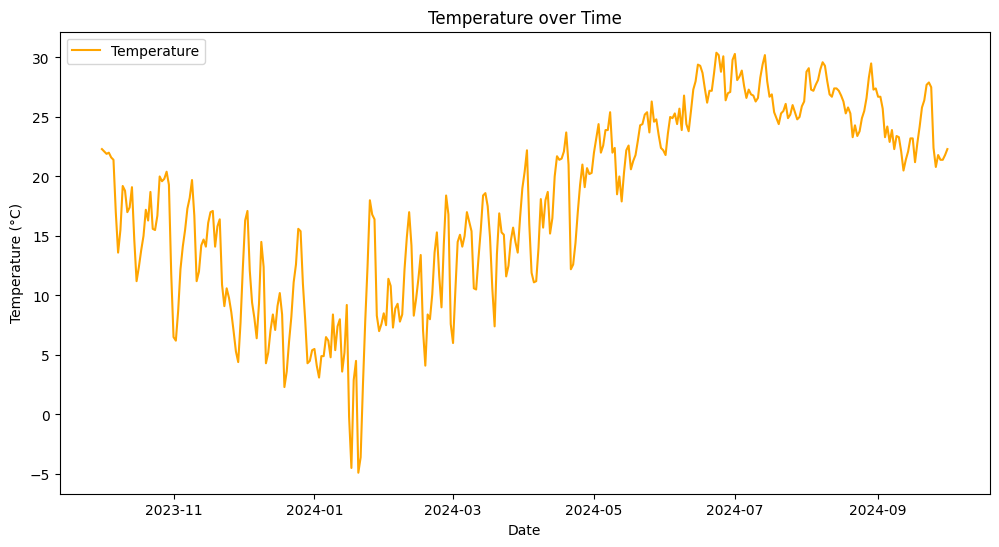

In [13]:

# Plotting a time series for temperature over time (if the date column exists)
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    plt.figure(figsize=(12, 6))
    plt.plot(data['datetime'], data['temp'], color='orange', label='Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature over Time')
    plt.legend()
    # plt.show()
    plt.savefig("temperature over time")
else:
    print("The dataset does not contain a 'datetime' column for time series analysis.")
